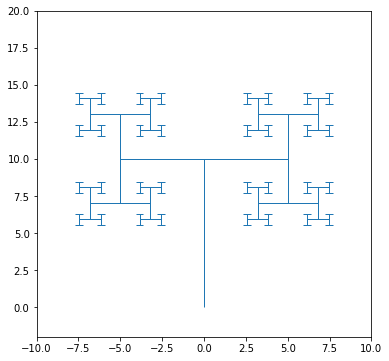

In [74]:
import numpy as np
import pylab as pl
from matplotlib import collections  as mc
import matplotlib.pyplot as plt

def frac_tree(n):
    # summation 2^n
    lines = np.zeros((2**(n+1), 2, 2))
    lines[0] = [[0, 0], [0, 10]]
    lines[1] = [[-5,10], [5,10]]
    for i in range(1,n+1):        
        # if x's are the same then make next line horizontal
        if lines[2**(i-1)][0][0] == lines[2**(i-1)][1][0]:
            linelen = abs(lines[2**(i-1)][0][1] - lines[2**(i-1)][1][1])*.6
            count = 0
            for j in range(0,2**i,2):
                x = lines[2**(i-1) + count][1][0] # x value              
                yb = lines[2**(i-1) + count][0][1] # y bottom
                lines[2**(i)+j] = [[x - linelen/2, yb],[x + linelen/2, yb]]
                yu = lines[2**(i-1) + count][1][1]  # y upper                 
                lines[2**(i)+j+1] = [[x - linelen/2, yu],[x + linelen/2, yu]]
                count += 1
        else: 
            linelen = abs(lines[2**(i-1)][0][0] - lines[2**(i-1)][1][0])*.6
            count = 0
            for j in range(0,2**i,2):
                y = lines[2**(i-1) + count][0][1] # y value              
                xl = lines[2**(i-1) + count][0][0] # x left
                lines[2**(i)+j] = [[xl, y + linelen/2],[xl, y - linelen/2]]
                xr = lines[2**(i-1) + count][1][0]  # x right
                lines[2**(i)+j+1] = [[xr, y + linelen/2],[xr, y - linelen/2]]
                count += 1                
    return(lines)
               
             
n = 6
lines = frac_tree(n)
lc = mc.LineCollection(lines, linewidths=1)
r=6
fig, ax = pl.subplots(figsize = (r,r))
ax.add_collection(lc)
#ax.autoscale()
ax.set_xlim(-10,10)
ax.set_ylim(-2,20)
ax.margins(0.1)
ax.autoscale(False)
plt.show()